In [1]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

# Direct adaptive control

In [2]:
T = 20
ap = -2.
bp = 1.5
sign_bp = bp / abs(bp)
am = 1
bm = 2
theta_star = (ap - am) / bp
k_star = bm / bp
ai = 1

def ref(t):
    if t < 5:
        r = 3
    elif t < 10:
        r = -2
    elif t < 15:
        r = 5
    else:
        r = 1
    return r

In [3]:
def direct(t, x):
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    theta_dot = -sign_bp * ec * xp
    k_dot = -sign_bp * ec * r
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot]

x0 = [0 for i in range(5)]
sol1 = solve_ivp(direct, [0, T], x0)
x = sol1.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star

Text(0, 0.5, 'Controller parameter errors')

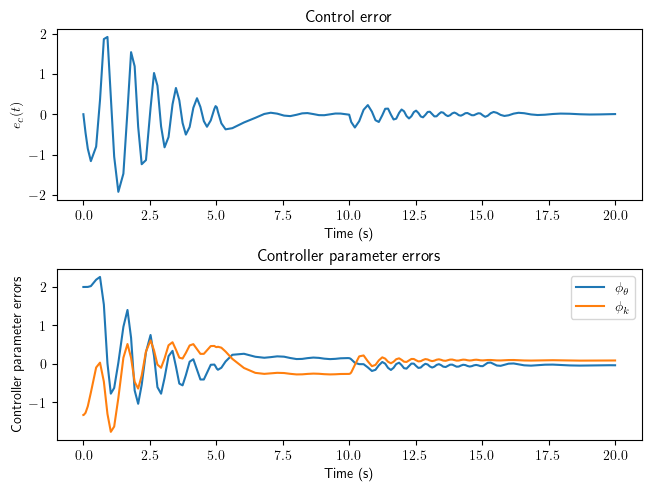

In [4]:
fig, axs = plt.subplots(2, 1, layout='constrained')
p0, = axs[0].plot(sol1.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol1.t, phi_theta)
p2, = axs[1].plot(sol1.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Controller parameter errors')

Dynamical method

In [5]:
def direct_dynamic(t, x):
    "Eq (14), (15), (18), (19)"
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    ap_hat = x[5]
    bp_hat = x[6]
    
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    theta_dot = -sign_bp * ec * xp
    k_dot = -sign_bp * ec * r
    
    eta_a = ap_hat - ap
    eta_b = bp_hat - bp
    e_theta = -ap_hat + bp_hat * theta + am
    e_k = bp_hat * k - bm
    ap_hat_dot = e_theta
    bp_hat_dot = -theta * e_theta - k * e_k
    
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot, ap_hat_dot, bp_hat_dot]

x0 = [0 for i in range(7)]
sol2 = solve_ivp(direct_dynamic, [0, T], x0)
x = sol2.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star
eta_a = x[5, :] - ap
eta_b = x[6, :] - bp

Text(0, 0.5, 'Plant parameter errors')

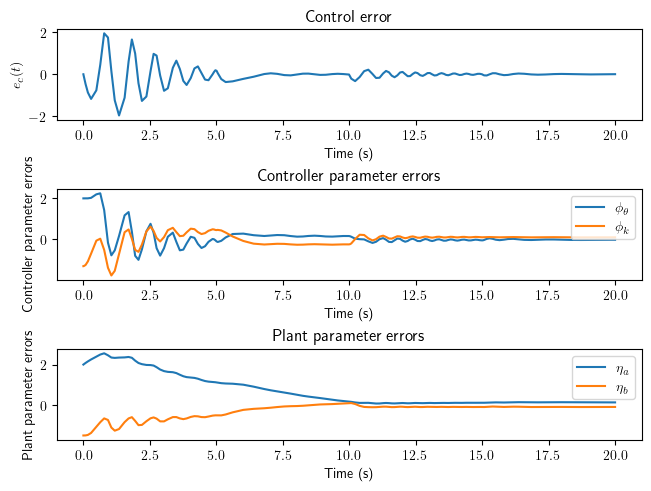

In [6]:
fig, axs = plt.subplots(3, 1, layout='constrained')
p0, = axs[0].plot(sol2.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol2.t, phi_theta)
p2, = axs[1].plot(sol2.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Controller parameter errors')

p3, = axs[2].plot(sol2.t, eta_a)
p4, = axs[2].plot(sol2.t, eta_b)
axs[2].legend((p3, p4), (r'$\eta_a$', r'$\eta_b$'))
axs[2].set_title('Plant parameter errors')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Plant parameter errors')

In [7]:
def direct_dynamic_modified1(t, x):
    "Eq (20), (21)"
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    ap_hat = x[5]
    bp_hat = x[6]
    
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    
    eta_a = ap_hat - ap
    eta_b = bp_hat - bp
    e_theta = -ap_hat + bp_hat * theta + am
    e_k = bp_hat * k - bm
    ap_hat_dot = e_theta
    bp_hat_dot = -theta * e_theta - k * e_k
    
    theta_dot = -sign_bp * (ec * xp + e_theta)
    k_dot = -sign_bp * (ec * r + e_k)
    
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot, ap_hat_dot, bp_hat_dot]

x0 = [0 for i in range(7)]
sol3 = solve_ivp(direct_dynamic_modified1, [0, T], x0)
x = sol3.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star
eta_a = x[5, :] - ap
eta_b = x[6, :] - bp

Text(0, 0.5, 'Plant parameter errors')

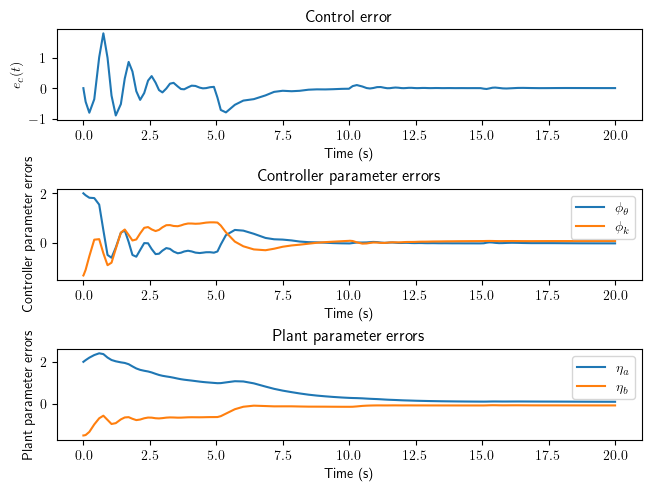

In [8]:
fig, axs = plt.subplots(3, 1, layout='constrained')
p0, = axs[0].plot(sol3.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol3.t, phi_theta)
p2, = axs[1].plot(sol3.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Controller parameter errors')

p3, = axs[2].plot(sol3.t, eta_a)
p4, = axs[2].plot(sol3.t, eta_b)
axs[2].legend((p3, p4), (r'$\eta_a$', r'$\eta_b$'))
axs[2].set_title('Plant parameter errors')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Plant parameter errors')

In [9]:
def direct_dynamic_modified2(t, x):
    "Eq (22), (23), (24), (25)"
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    ap_hat = x[5]
    bp_hat = x[6]
    xp_hat = x[7]
    ei = x[8]
    
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    
    eta_a = ap_hat - ap
    eta_b = bp_hat - bp
    e_theta = -ap_hat + bp_hat * theta + am
    e_k = bp_hat * k - bm
    
    theta_dot = -sign_bp * ec * xp
    k_dot = -sign_bp * ec * r
    
    xp_hat_dot = -ai * ei - ap_hat * xp + bp_hat * u
    ei_dot = -ai * ei - eta_a * xp + eta_b * u
    
    ap_hat_dot = ei * xp
    bp_hat_dot = -ei * u
    
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot, ap_hat_dot, bp_hat_dot, xp_hat_dot, ei_dot]

x0 = [0 for i in range(9)]
sol4 = solve_ivp(direct_dynamic_modified2, [0, T], x0)
x = sol4.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star
eta_a = x[5, :] - ap
eta_b = x[6, :] - bp
ei = x[8, :]

Text(0, 0.5, '$e_i$')

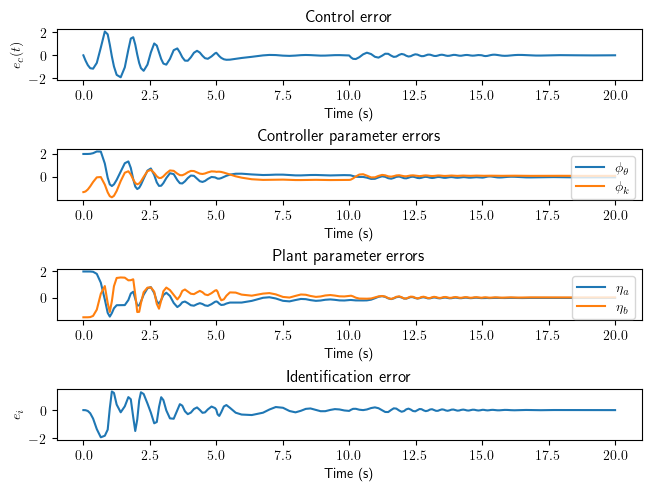

In [10]:
fig, axs = plt.subplots(4, 1, layout='constrained')
p0, = axs[0].plot(sol4.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol4.t, phi_theta)
p2, = axs[1].plot(sol4.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
# axs[1].set_ylabel('Controller parameter errors')

p3, = axs[2].plot(sol4.t, eta_a)
p4, = axs[2].plot(sol4.t, eta_b)
axs[2].legend((p3, p4), (r'$\eta_a$', r'$\eta_b$'))
axs[2].set_title('Plant parameter errors')
axs[2].set_xlabel('Time (s)')
# axs[2].set_ylabel('Plant parameter errors')

p5, = axs[3].plot(sol4.t, ei)
axs[3].set_title('Identification error')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel(r'$e_i$')

# Indirect adaptive control

In [11]:
ai = am
def indirect_dynamical1(t, x):
    "Eq (31), (32), (33), (34), (35)"
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    ap_hat = x[5]
    bp_hat = x[6]
    xp_hat = x[7]
    ei = x[8]
    em = x[9]
    
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    
    eta_a = ap_hat - ap
    eta_b = bp_hat - bp
    e_theta = -ap_hat + bp_hat * theta + am
    e_k = bp_hat * k - bm
    
    em_dot = -am * em + bp * phi_theta * xp + bp * phi_k * r - eta_a * xp + eta_b * u
    
    theta_dot = -sign_bp * em * xp
    k_dot = -sign_bp * em * r
    
    xp_hat_dot = -ai * ei - ap_hat * xp + bp_hat * u
    ei_dot = -ai * ei - eta_a * xp + eta_b * u
    
    ap_hat_dot = ei * xp + em * xp
    bp_hat_dot = -ei * u - em * u
    
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot, ap_hat_dot, bp_hat_dot, xp_hat_dot, ei_dot, em_dot]

x0 = [0 for i in range(10)]
sol5 = solve_ivp(indirect_dynamical1, [0, T], x0)
x = sol5.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star
eta_a = x[5, :] - ap
eta_b = x[6, :] - bp
ei = x[8, :]
em = x[9, :]

Text(0, 0.5, '$e_m$')

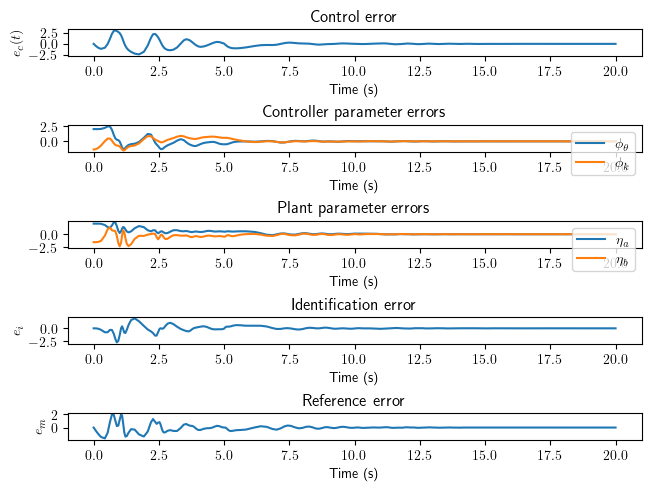

In [12]:
fig, axs = plt.subplots(5, 1, layout='constrained')
p0, = axs[0].plot(sol5.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol5.t, phi_theta)
p2, = axs[1].plot(sol5.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
# axs[1].set_ylabel('Controller parameter errors')

p3, = axs[2].plot(sol5.t, eta_a)
p4, = axs[2].plot(sol5.t, eta_b)
axs[2].legend((p3, p4), (r'$\eta_a$', r'$\eta_b$'))
axs[2].set_title('Plant parameter errors')
axs[2].set_xlabel('Time (s)')
# axs[2].set_ylabel('Plant parameter errors')

p5, = axs[3].plot(sol5.t, ei)
axs[3].set_title('Identification error')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel(r'$e_i$')

p6, = axs[4].plot(sol5.t, em)
axs[4].set_title('Reference error')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel(r'$e_m$')

In [13]:
ai = am
def indirect_dynamical2(t, x):
    "Eq (36), (37), (38), (39)"
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    ap_hat = x[5]
    bp_hat = x[6]
    xp_hat = x[7]
    ei = x[8]
    em = x[9]
    
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    
    eta_a = ap_hat - ap
    eta_b = bp_hat - bp
    e_theta = -ap_hat + bp_hat * theta + am
    e_k = bp_hat * k - bm
    
    em_dot = -am * em + bp * phi_theta * xp + bp * phi_k * r - eta_a * xp + eta_b * u
    
    theta_dot = -sign_bp * (em * xp + e_theta)
    k_dot = -sign_bp * (em * r + e_k)
    
    xp_hat_dot = -ai * ei - ap_hat * xp + bp_hat * u
    ei_dot = -ai * ei - eta_a * xp + eta_b * u
    
    ap_hat_dot = ei * xp + em * xp + e_theta
    bp_hat_dot = -ei * u - em * u - theta * e_theta - k * e_k
    
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot, ap_hat_dot, bp_hat_dot, xp_hat_dot, ei_dot, em_dot]

x0 = [0 for i in range(10)]
sol6 = solve_ivp(indirect_dynamical1, [0, T], x0)
x = sol6.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star
eta_a = x[5, :] - ap
eta_b = x[6, :] - bp
ei = x[8, :]
em = x[9, :]

Text(0, 0.5, '$e_m$')

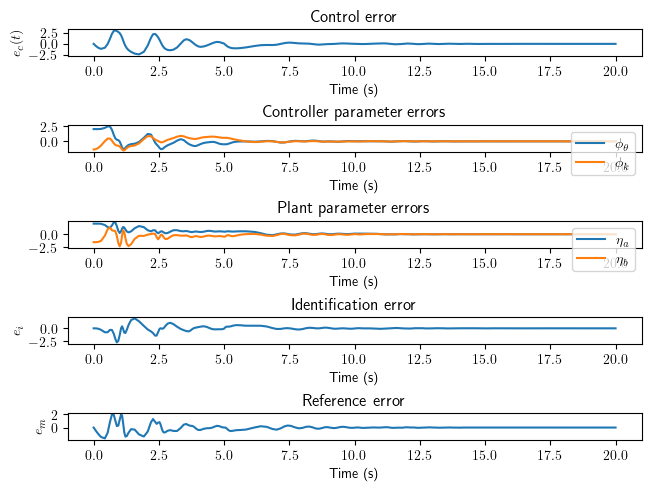

In [14]:
fig, axs = plt.subplots(5, 1, layout='constrained')
p0, = axs[0].plot(sol6.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol6.t, phi_theta)
p2, = axs[1].plot(sol6.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
# axs[1].set_ylabel('Controller parameter errors')

p3, = axs[2].plot(sol6.t, eta_a)
p4, = axs[2].plot(sol6.t, eta_b)
axs[2].legend((p3, p4), (r'$\eta_a$', r'$\eta_b$'))
axs[2].set_title('Plant parameter errors')
axs[2].set_xlabel('Time (s)')
# axs[2].set_ylabel('Plant parameter errors')

p5, = axs[3].plot(sol6.t, ei)
axs[3].set_title('Identification error')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel(r'$e_i$')

p6, = axs[4].plot(sol6.t, em)
axs[4].set_title('Reference error')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel(r'$e_m$')

# Combined MRAC

In [15]:
ai = am
def indirect_dynamical2(t, x):
    "Eq (36), (37), (38), (39)"
    r = ref(t)
    xp = x[0]
    xm = x[1]
    ec = x[2]
    theta = x[3]
    k = x[4]
    ap_hat = x[5]
    bp_hat = x[6]
    xp_hat = x[7]
    ei = x[8]
    em = x[9]
    
    phi_theta = theta - theta_star
    phi_k = k - k_star
    u = theta * xp + k * r
    xp_dot = -ap * xp + bp * u
    xm_dot = -am * xm + bm * r
    ec_dot = -am * ec + bp * phi_theta * xp + bp * phi_k * r
    
    eta_a = ap_hat - ap
    eta_b = bp_hat - bp
    
    # closed-loop estimation errors
    e_theta = -ap_hat + bp_hat * theta + am
    e_k = bp_hat * k - bm
    
    em_dot = -am * em + bp * phi_theta * xp + bp * phi_k * r - eta_a * xp + eta_b * u
    
    # control adaptive law
    theta_dot = -sign_bp * (ec * xp + e_theta)
    k_dot = -sign_bp * (ec * r + e_k)
    
    xp_hat_dot = -ai * ei - ap_hat * xp + bp_hat * u
    ei_dot = -ai * ei - eta_a * xp + eta_b * u
    
    # identification adaptive law
    ap_hat_dot = ei * xp + e_theta
    bp_hat_dot = -ei * u - theta * e_theta - k * e_k
    
    return [xp_dot, xm_dot, ec_dot, theta_dot, k_dot, ap_hat_dot, bp_hat_dot, xp_hat_dot, ei_dot, em_dot]

x0 = [0 for i in range(10)]
sol7 = solve_ivp(indirect_dynamical1, [0, T], x0)
x = sol7.y
ec = x[2, :]
phi_theta = x[3, :] - theta_star
phi_k = x[4, :] - k_star
eta_a = x[5, :] - ap
eta_b = x[6, :] - bp
ei = x[8, :]
em = x[9, :]

Text(0, 0.5, '$e_m$')

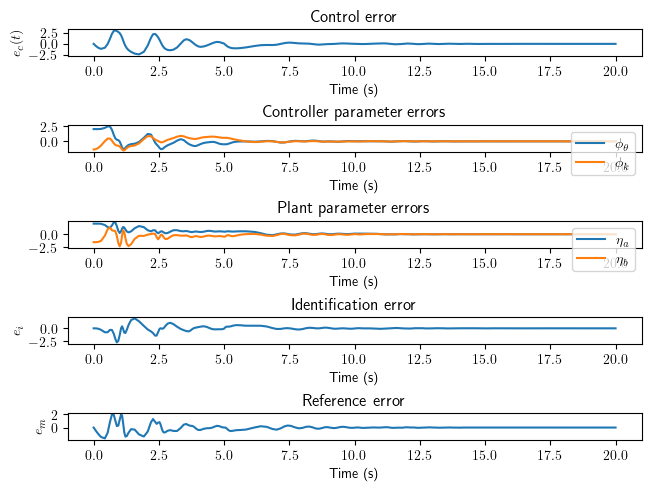

In [16]:
fig, axs = plt.subplots(5, 1, layout='constrained')
p0, = axs[0].plot(sol7.t, ec)
axs[0].set_title('Control error')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$e_c(t)$')

p1, = axs[1].plot(sol7.t, phi_theta)
p2, = axs[1].plot(sol7.t, phi_k)
axs[1].legend((p1, p2), (r'$\phi_\theta$', r'$\phi_k$'))
axs[1].set_title('Controller parameter errors')
axs[1].set_xlabel('Time (s)')
# axs[1].set_ylabel('Controller parameter errors')

p3, = axs[2].plot(sol7.t, eta_a)
p4, = axs[2].plot(sol7.t, eta_b)
axs[2].legend((p3, p4), (r'$\eta_a$', r'$\eta_b$'))
axs[2].set_title('Plant parameter errors')
axs[2].set_xlabel('Time (s)')
# axs[2].set_ylabel('Plant parameter errors')

p5, = axs[3].plot(sol7.t, ei)
axs[3].set_title('Identification error')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel(r'$e_i$')

p6, = axs[4].plot(sol7.t, em)
axs[4].set_title('Reference error')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel(r'$e_m$')